# 1. Import libraries

In [363]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
import pickle
import joblib

# 2. Load Dataset

In [364]:
data = pd.read_csv('Telco_customer_churn.csv')

# 3. Perform exploratory data analysis

In [365]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [366]:
data.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [367]:
data.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

<Axes: xlabel='Churn Value', ylabel='count'>

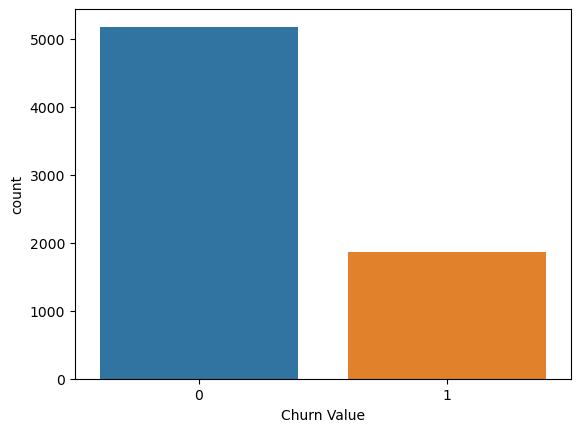

In [368]:
sns.countplot(x='Churn Value', data=data)

C:\Users\abdel\AppData\Local\Temp\ipykernel_17564\4009627306.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

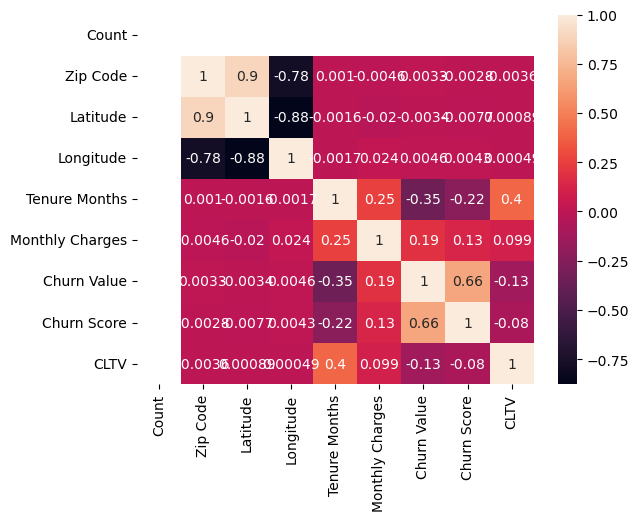

In [369]:
corr = data.corr()
sns.heatmap(corr, annot=True)

# 4. Clean the data

In [370]:
data.drop(['CustomerID', 'Lat Long','Churn Score', 'Churn Reason', 'Country', 'State', 'City'], axis=1, inplace=True)
# We drop the table that don't need and somme columns can't be converted to numerical value

In [371]:
data = pd.get_dummies(data, columns=['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'])

In [372]:
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce') # Convert TotalCharges to numeric and replace invalid values with NaN
data.dropna(inplace=True)

In [373]:
X = data.drop(['Churn Value', 'Churn Label'], axis=1)
y = data['Churn Value']

In [374]:
data.dtypes

Count                                         int64
Zip Code                                      int64
Latitude                                    float64
Longitude                                   float64
Tenure Months                                 int64
Monthly Charges                             float64
Total Charges                               float64
Churn Label                                  object
Churn Value                                   int64
CLTV                                          int64
Gender_Female                                 uint8
Gender_Male                                   uint8
Senior Citizen_No                             uint8
Senior Citizen_Yes                            uint8
Partner_No                                    uint8
Partner_Yes                                   uint8
Dependents_No                                 uint8
Dependents_Yes                                uint8
Phone Service_No                              uint8
Phone Servic

In [375]:
data.head(30)

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Label,Churn Value,CLTV,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,90003,33.964131,-118.272783,2,53.85,108.15,Yes,1,3239,...,0,1,0,0,0,1,0,0,0,1
1,1,90005,34.059281,-118.307420,2,70.70,151.65,Yes,1,2701,...,0,1,0,0,0,1,0,0,1,0
2,1,90006,34.048013,-118.293953,8,99.65,820.50,Yes,1,5372,...,1,1,0,0,0,1,0,0,1,0
3,1,90010,34.062125,-118.315709,28,104.80,3046.05,Yes,1,5003,...,1,1,0,0,0,1,0,0,1,0
4,1,90015,34.039224,-118.266293,49,103.70,5036.30,Yes,1,5340,...,1,1,0,0,0,1,1,0,0,0
5,1,90020,34.066367,-118.309868,10,55.20,528.35,Yes,1,5925,...,0,1,0,0,1,0,0,1,0,0
6,1,90022,34.023810,-118.156582,1,39.65,39.65,Yes,1,5433,...,1,1,0,0,0,1,0,0,1,0
7,1,90024,34.066303,-118.435479,1,20.15,20.15,Yes,1,4832,...,0,1,0,0,1,0,0,0,0,1
8,1,90028,34.099869,-118.326843,47,99.35,4749.15,Yes,1,5789,...,1,1,0,0,0,1,0,0,1,0
9,1,90029,34.089953,-118.294824,1,30.20,30.20,Yes,1,2915,...,0,1,0,0,1,0,0,0,1,0


# 5. Split the data into train-test or train-val-test

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [377]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Build the model and train

In [378]:
knn = KNeighborsClassifier()

In [379]:
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.762085308056872


In [380]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1522
           1       0.58      0.55      0.56       588

    accuracy                           0.76      2110
   macro avg       0.70      0.70      0.70      2110
weighted avg       0.76      0.76      0.76      2110



In [381]:
print(confusion_matrix(y_test, y_pred))

[[1282  240]
 [ 262  326]]


# Search the best hyper-parameters 

In [382]:
param_grid = {'n_neighbors': range(30, 50, 2), 'p': [1, 2],}

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy_ :", grid_search.best_score_)

Best Parameters: {'n_neighbors': 40, 'p': 1}
Accuracy_ : 0.7919557591515001


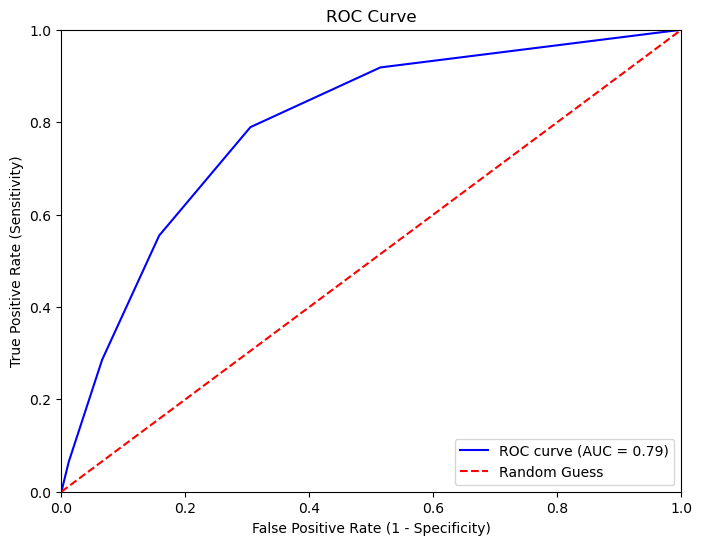

In [383]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

In [384]:
file = 'knn_telco.sav'
pickle.dump(knn, open(file, 'wb'))

In [385]:
joblib.dump(grid_search.best_score_, 'svm_model.joblib')

['svm_model.joblib']